In [196]:
# The following is necessary to run the cells that follow. Run this cell once at the beginning, then not again.
%load_ext autoreload
# Changes made to .py files are reflected here
%autoreload 2       
# Reload all modules every time before executing the Python code typed.
import sys         # used for path appending
import matplotlib.pyplot as plt # used for plotting
sys.path.append("../../") # / directory
sys.path.append("../")  # /src/ directory
plt.rcParams["figure.figsize"] = [12, 7] #  Size of figures created from plots by default [12,7]

#       contains_filter
#
#   Creates a filter based on a field, and an expected parameter.
#
#
def contains_filter(field, value = None):
    if value:
        print("Value present")
        def field_filter(row):
            if field in row:
                if row[field] == value:
                    print("True!")
                    return True
            print("Returning false")
            return False
    else:
        print("Value is not present")
        def field_filter(row):
            if field in row:
                if row[field]:
                    return True
            print("Returning false 2")
            return False
    return field_filter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# A gc_event_dataframe has the following columns
> ## DateTime

> ## TimeFromStart_seconds

> ## EventType

> ## EventName

> ## AdditionalEventInfo

> ## MemoryChange_MB

> ## Duration_miliseconds

In [197]:
import os.path
from src.read_log_file import get_parsed_comparions_from_files, get_file_names_wildcard
import pandas as pd


filepaths = ['/Users/ellisbrown/Desktop/Project/datasets/other-team-analysis/GCLogs_Post_Jdk11_ma1-athena1p-lapp459.txt']
labels = ["Jdk11 Shenandoah log"]

csv_files_to_import = ["/Users/ellisbrown/Desktop/Project/datasets/other-team-analysis/throughput.csv"]
csv_file_labels = ["Application's response times"]

files= []
time_range_seconds = None 
for filepath in filepaths:
    files.append(get_file_names_wildcard(filepath))
gc_event_dataframes = get_parsed_comparions_from_files(files, time_range_seconds,  ignore_crashes=True)

################################################################################################
for csv_file, label in zip(csv_files_to_import, csv_file_labels):
    if os.path.isfile(csv_file):
        print(len(labels))
        df = pd.read_csv(csv_file)
        gc_event_dataframes.append(df)
        labels.append(label)
    else:
        print("Error: Unable to find file " + csv_file)
if len(gc_event_dataframes) != len(labels):
    print("Error: Labels do not have same length as collected data")

1


In [198]:
print(len(files))
print(len(gc_event_dataframes))
print(len(labels))

1
2
2


## Compare STW pauses during runtime

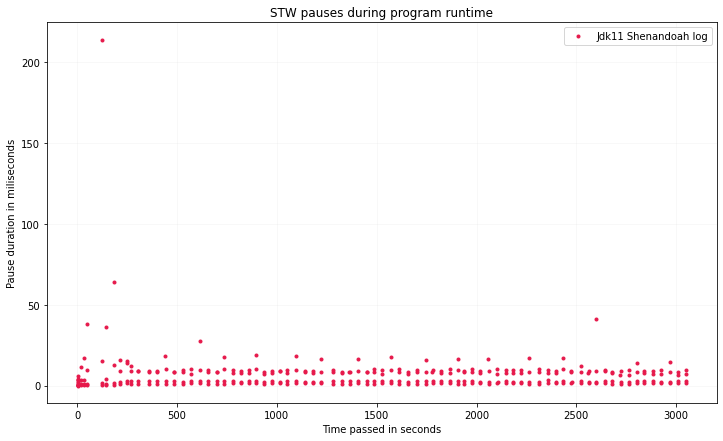

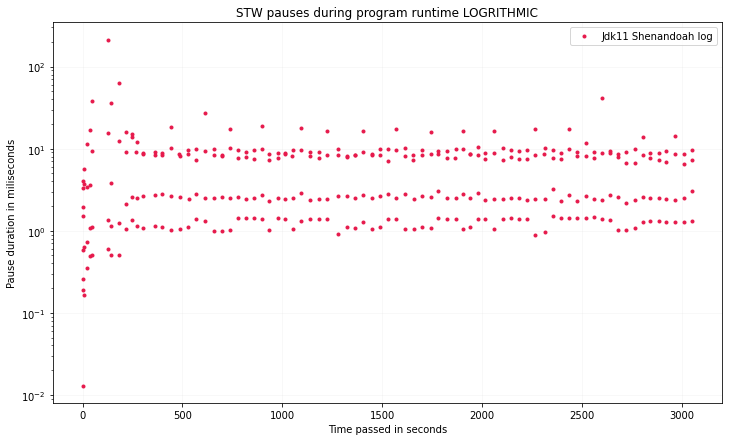

In [199]:
from plotting import plot_scatter

# Chart #1, linear Y axis

# Create a filter that will only take rows from a gc_event_dataframe that represent Pauses.
def pauses_only(row):
    if "EventType" in row:
        if row["EventType"] == "Pause":
            return True
    return False 
pauses_only = [pauses_only]
# Apply the filter, and create a plot
plot = plot_scatter(gc_event_dataframes, 
                    filter_by = pauses_only,
                    labels=labels)
# Set the style and details on the plot
_ = plot.set_title("STW pauses during program runtime")
plot.set_xlabel("Time passed in seconds")
plot.set_ylabel("Pause duration in miliseconds")
# The alpha value makes the grid harder to see.9
plot.grid(alpha = 0.1)

############################################################################################################
# Chart #2, logarithmic Y axis
plot = plot_scatter(gc_event_dataframes, filter_by = pauses_only, labels = labels)
plot.set_yscale("log") # LOGRITHMIC log set, using already plotted values
_ = plot.set_title("STW pauses during program runtime LOGRITHMIC")
plot.set_xlabel("Time passed in seconds")
plot.set_ylabel("Pause duration in miliseconds")
plot.grid(alpha = 0.1)



## Pauses by name during runtime

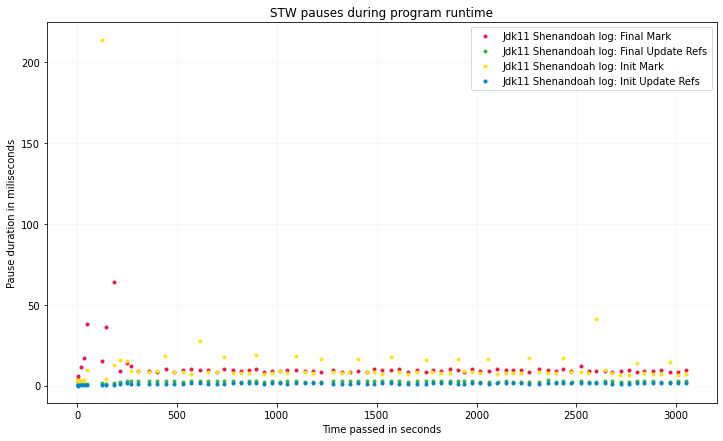

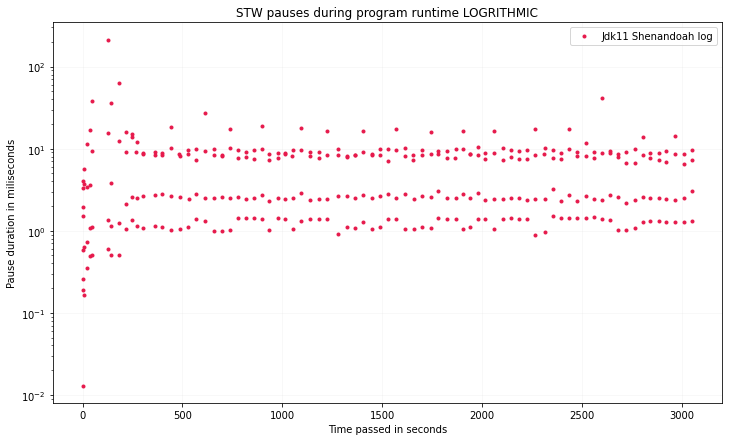

In [200]:
from plotting import plot_scatter

# Chart #1, linear Y axis

# Create a filter that will only take rows from a gc_event_dataframe that represent Pauses.

def pauses_only(row):
    if "EventType" in row:
        if row["EventType"] == "Pause":
            return True
    return False 
pauses_only = [pauses_only]

# Apply the filter, and create a plot
plot = plot_scatter(gc_event_dataframes,
                    filter_by = pauses_only, 
                    labels=labels, 
                    group_by = "EventName")

plot = plot_scatter(gc_event_dataframes, 
                    filter_by= athena_metric_filter,
                    labels=labels,  
                    column= "athena_metric",
                    plot = plot,
                    colors = ["b"]
                    )
# Set the style and details on the plot
_ = plot.set_title("STW pauses during program runtime")
plot.set_xlabel("Time passed in seconds")
plot.set_ylabel("Pause duration in miliseconds")
# The alpha value makes the grid harder to see.9
plot.grid(alpha = 0.1)
############################################################################################################
# Chart #2, logarithmic Y axis
plot = plot_scatter(gc_event_dataframes, filter_by = pauses_only, labels = labels)
plot.set_yscale("log") # LOGRITHMIC log set, using already plotted values
_ = plot.set_title("STW pauses during program runtime LOGRITHMIC")
plot.set_xlabel("Time passed in seconds")
plot.set_ylabel("Pause duration in miliseconds")
plot.grid(alpha = 0.1)



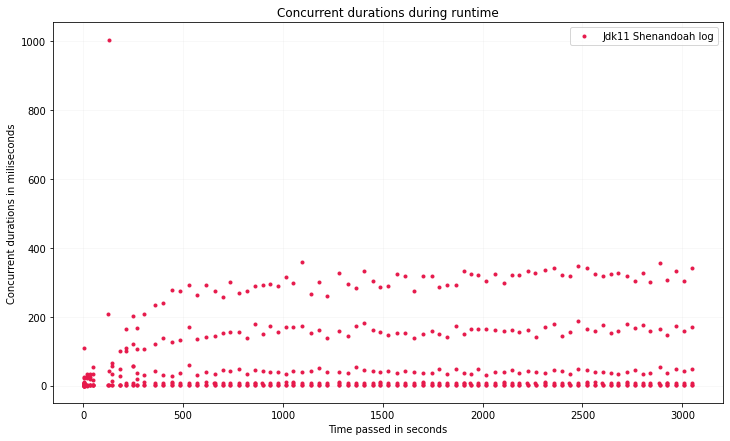

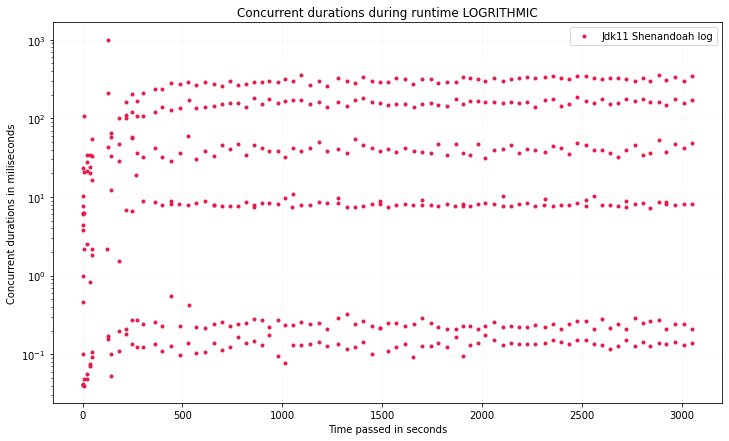

In [201]:
from plotting import plot_scatter

# Linear graph
def concurrent_only(row):
    if "EventType" in row:
        if row["EventType"] == "Concurrent":
            
            return True
    return False
concurrent_only = [concurrent_only]
plot = plot_scatter(gc_event_dataframes, labels=labels, filter_by= concurrent_only)
_ = plot.set_title("Concurrent durations during runtime")
plot.set_xlabel("Time passed in seconds")
plot.set_ylabel("Concurrent durations in miliseconds")
plot.grid(alpha = 0.1)

# Logarithmic graph
plot = plot_scatter(gc_event_dataframes, labels=labels, filter_by= concurrent_only)
plot.set_yscale("log")
_ = plot.set_title("Concurrent durations during runtime LOGRITHMIC")
plot.set_xlabel("Time passed in seconds")
plot.set_ylabel("Concurrent durations in miliseconds")
plot.grid(alpha = 0.1)


## Time spent in STW vs. Concurrent

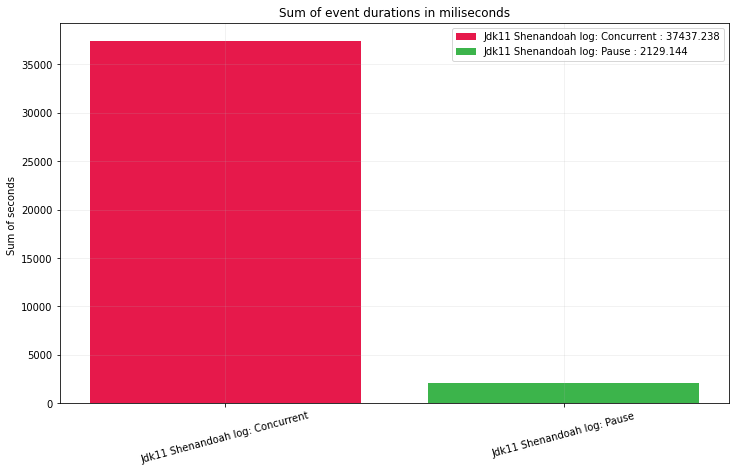

In [202]:
from plotting import plot_bar_sum

log = False # Set to True to view log bar graph as well
def duration_present(row):
    if "Duration_miliseconds" in row:
        if row["Duration_miliseconds"]:
            return True
    return False
duration_present = [duration_present]
# The grouping by eventtype means that every matching event name lives in one group. 
# Example: "Concurrent" events are a group, and "Pause" events are a group
plot = plot_bar_sum(gc_event_dataframes, group_by = "EventType", filter_by = duration_present, labels= labels)
_ = plot.set_title("Sum of event durations in miliseconds")
_ = plot.set_ylabel("Sum of seconds ")
_ = plt.xticks(rotation = 15)
plot.grid(alpha = 0.2)
if log:
    plot = plot_bar_sum(gc_event_dataframes, group_by = "EventType", filter_by = duration_present, labels= labels)
    _ = plot.set_title("Sum of event durations in miliseconds, LOGARITHMIC")
    _ = plot.set_ylabel("Sum of seconds ")
    plot.set_yscale("log") # LOGRITHMIC log set, using already plotted values
    plot.grid(alpha = 0.2)
    _ = plt.xticks(rotation = 15)



## Comparing Trends within the data

In [203]:
from plotting import plot_trends


def pauses_only(row):
       if "EventType" in row:
              if row["EventType"] == "Pause":
                     return True
       return False
pauses_only = [pauses_only]


print("\t\t\tPauses during runtime\n------------------------------------------------------------------------------------------------------------------")
plot_trends(gc_event_dataframes, 
       filter_by = pauses_only,
       labels= labels,
       throughput=True)
print("\n")

print("\t\t\tPauses by name during runtime\n------------------------------------------------------------------------------------------------------------------")
plot_trends(gc_event_dataframes, 
       group_by = "EventName",
       filter_by = pauses_only,
       labels= labels)


			Pauses during runtime
------------------------------------------------------------------------------------------------------------------
Legend: 
A | Jdk11 Shenandoah log
-------------------------------------------------------------------------------------------------
  Trends (ms)   | Event Count   | Max Duration  | Sum Duration  | Mean Duration | Std Dev.      | Throughput    |
-----------------------------------------------------------------------------------------------------------------
A               |  316.0000     |  213.7190     | 2129.1440     |    6.7378     |   13.3309     |   99.9300     % 


			Pauses by name during runtime
------------------------------------------------------------------------------------------------------------------
Legend: 
A | Jdk11 Shenandoah log: Final Mark
B | Jdk11 Shenandoah log: Final Update Refs
C | Jdk11 Shenandoah log: Init Mark
D | Jdk11 Shenandoah log: Init Update Refs
------------------------------------------------------------------

## Percentiles of event durations

In [204]:
from plotting import plot_percentiles

def pauses_only(row):
       if "EventType" in row:
              if row["EventType"] == "Pause":
                     return True
       return False
pauses_only = [pauses_only]

print("\t\t\tPauses during runtime\n----------------------------------------------------------------------------------")
plot_percentiles(gc_event_dataframes, 
       filter_by = pauses_only,
       labels= labels)

print("\n\n")
print("\t\t\tPauses during runtime by name\n----------------------------------------------------------------------------------")
plot_percentiles(gc_event_dataframes, 
       group_by = "EventName",
       filter_by= pauses_only,
       labels= labels)
       

			Pauses during runtime
----------------------------------------------------------------------------------
Legend (All timing in miliseconds) : 
A | Jdk11 Shenandoah log
-------------------------------------------------------------------------------------------------
    | 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
A   |    3.0520 |    8.7648 |   10.2015 |   16.3385 |   37.5757 |  166.5093 |  208.9980 | 



			Pauses during runtime by name
----------------------------------------------------------------------------------
Legend (All timing in miliseconds) : 
A | Jdk11 Shenandoah log: Final Mark
B | Jdk11 Shenandoah log: Final Update Refs
C | Jdk11 Shenandoah log: Init Mark
D | Jdk11 Shenandoah log: Init Update Refs
-------------------------------------------------------------------------------------------------
    | 50%       | 75%       | 90%    

## Mean durations in miliseconds, pauses

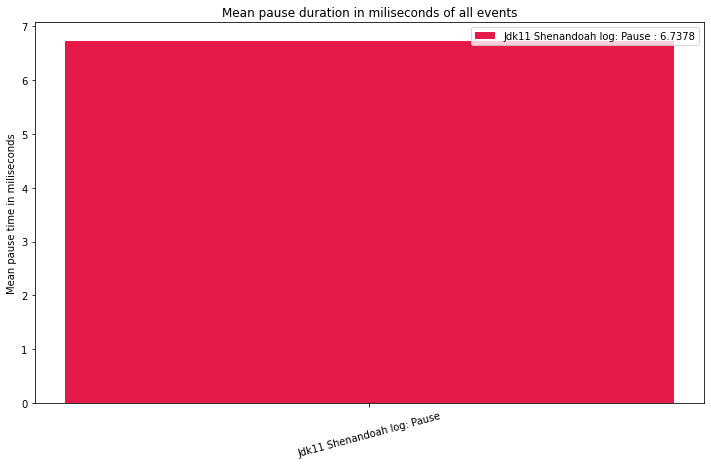

In [205]:

from plotting import plot_bar_avg

def pauses_only(row):
    if "EventType" in row:
        if row["EventType"] == "Pause":
            return True
    return False 
pauses_only = [pauses_only]

graph = plot_bar_avg(gc_event_dataframes, group_by = "EventType", filter_by = pauses_only, labels = labels)
_ = graph.set_title("Mean pause duration in miliseconds of all events")
_ = graph.set_ylabel("Mean pause time in miliseconds")
_ = plt.xticks(rotation = 15)

## Heap allocation used before & after GC

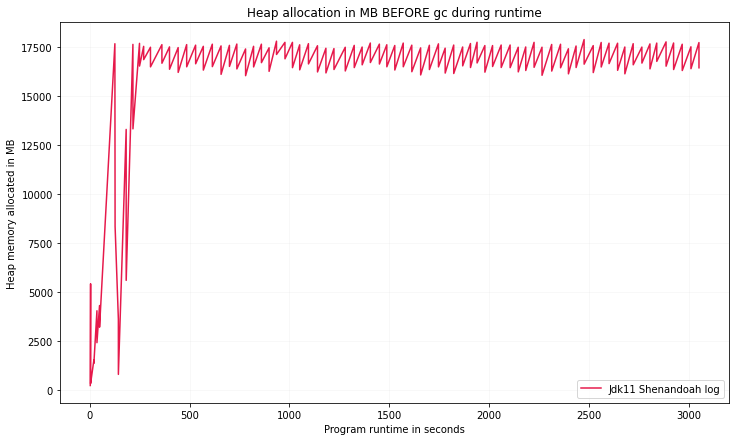

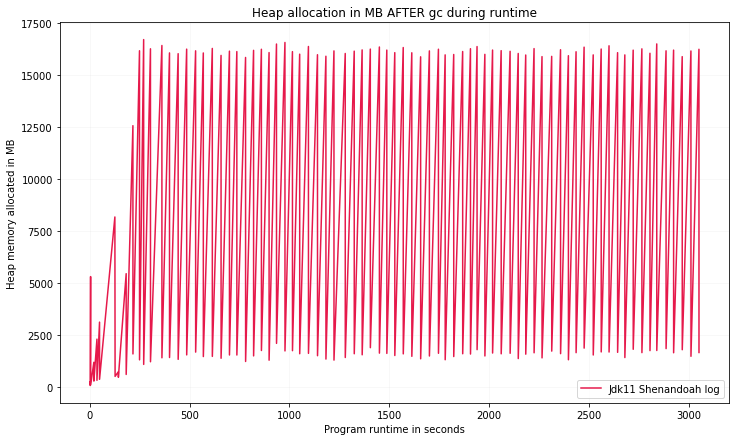

In [206]:
from plotting import plot_line

for df in gc_event_dataframes:
    if "TimeFromStart_seconds" in df:
        df.sort_values(by="TimeFromStart_seconds", axis=0,inplace=True)

def heap_before_gc(row):
    if "HeapBeforeGC" in row:
        if row["HeapBeforeGC"]:
            return True
    return False

heap_before_gc = [heap_before_gc]
plot = plot_line(gc_event_dataframes,
            group_by = None, 
            filter_by = heap_before_gc, # Confirm that this column has data for every row
            labels = labels,
            column = "HeapBeforeGC")

_ = plot.set_title("Heap allocation in MB BEFORE gc during runtime")
_ = plot.set_ylabel("Heap memory allocated in MB")
_ = plot.set_xlabel("Program runtime in seconds")
plot.grid(alpha = 0.1)

plot = plot_line(gc_event_dataframes,
            group_by = None, 
            filter_by = heap_before_gc,
            labels = labels,
            column = "HeapAfterGC" )
            #column_timing="DateTime")

_ = plot.set_title("Heap allocation in MB AFTER gc during runtime")
_ = plot.set_ylabel("Heap memory allocated in MB")
_ = plot.set_xlabel("Program runtime in seconds")

handles, labels = plot.get_legend_handles_labels()
plot.grid(alpha = 0.1)

## MB reclaimed during GC during runtime

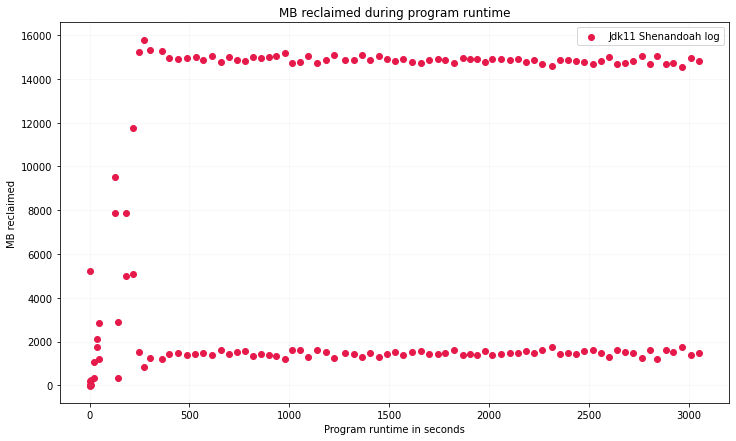

In [207]:
from plotting import plot_reclaimed_bytes

def gc_values_present(row):
    if "HeapBeforeGC" in row and "HeapAfterGC":
        if row["HeapBeforeGC"] != None and row["HeapAfterGC"] != None:
            return True
    return False

gc_values_present = [gc_values_present]

plot = plot_reclaimed_bytes(gc_event_dataframes, filter_by = gc_values_present, labels = labels)
_ = plot.set_title("MB reclaimed during program runtime")
_ = plot.set_ylabel("MB reclaimed")
_ = plot.set_xlabel("Program runtime in seconds")
plot.grid(alpha = 0.1)

## Heatmaps for each log

Jdk11 Shenandoah log Warning: At least one value lies outside of the provided time range. Max value outside range: 3050.937
Jdk11 Shenandoah log Warning: At least one value lies outside the provided range for latency. Max value outside range: 1004.504


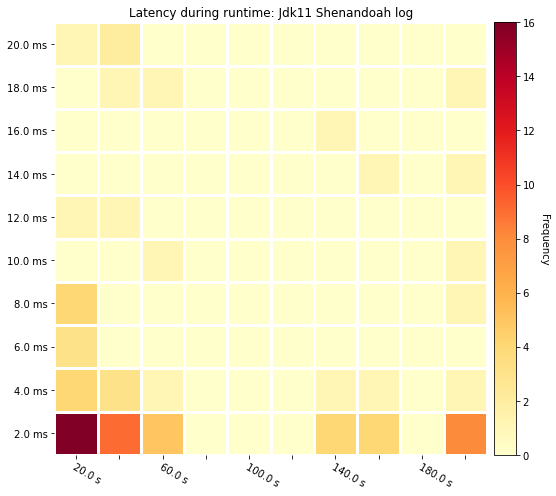

In [208]:
from src.graphing.heatmap import plot_heatmap, get_heatmap_data

for label, gc_event_dataframe in zip(labels, gc_event_dataframes):
    heatmap, dimensions = get_heatmap_data(gc_event_dataframe, 10,10, 20,2, label, True)     # Set the last value to FALSE to get warnings 
    if heatmap.size != 0 and dimensions:
        graph = plot_heatmap(heatmap, dimensions, False) # Set the last value to TRUE to see labels of frequency
        graph.set_title("Latency during runtime: " +  label)
        plt.rcParams["figure.figsize"] = [12, 7]


## Frequency of pauses histogram

Text(0.5, 1.0, 'Pause frequencies during full runtime')

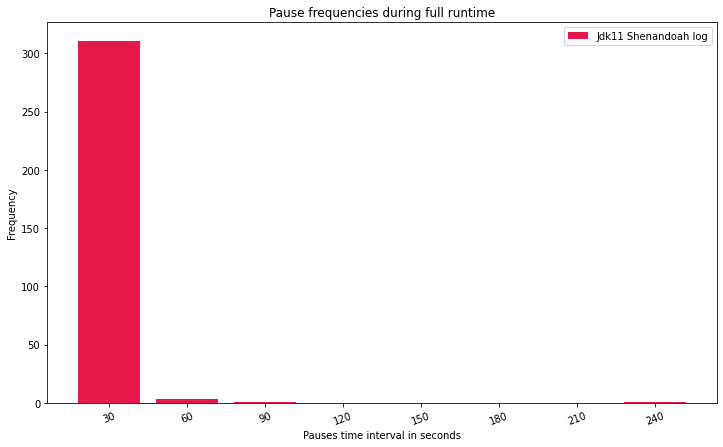

In [209]:
from plotting2 import plot_frequency_intervals
def pauses_only(row):
    if "EventType" in row:
        if row["EventType"] == "Pause":
            return True
    return False 
pauses_only = [pauses_only]

# All intervals are in seconds
plot = plot_frequency_intervals(gc_event_dataframes,
# /src
                         filter_by = pauses_only, 
                         interval_duration= 30, 
                         labels = labels)
_ = plt.xticks(rotation = 20)
plot.set_xlabel("Pauses time interval in seconds")
plot.set_ylabel("Frequency")
plot.set_title("Pause frequencies during full runtime")


Percentiles plotted:  [99.9, 90, 50]


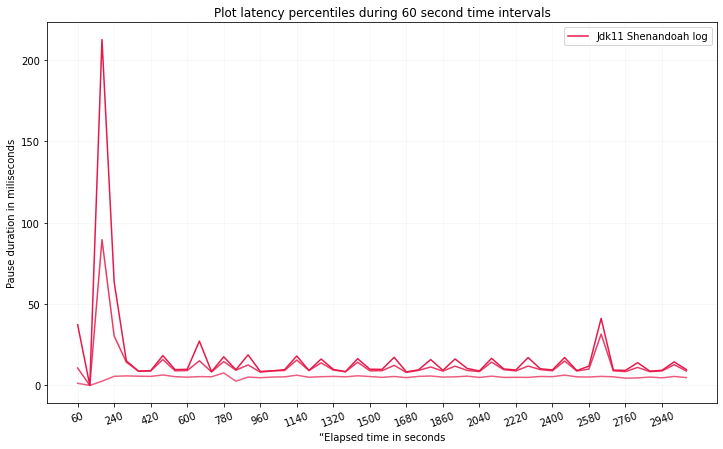

In [210]:
from plotting2 import plot_percentile_intervals
interval_duration = 60
percentiles = [99.9, 90, 50]
def pauses_only(row):
    if "EventType" in row:
        if row["EventType"] == "Pause":
            return True
    return False 
pauses_only = [pauses_only]
plot = plot_percentile_intervals(gc_event_dataframes, 
                                filter_by = pauses_only, 
                                interval_duration = interval_duration ,
                                labels = labels,
                                percentiles = percentiles )
plot.set_ylabel("Pause duration in miliseconds")
plot.set_xlabel("“Elapsed time in seconds")
plot.set_title("Plot latency percentiles during " + str(interval_duration) + " second time intervals")
plot.grid(alpha = 0.1)
_ = plt.xticks(rotation = 20)
print("Percentiles plotted: ", percentiles)


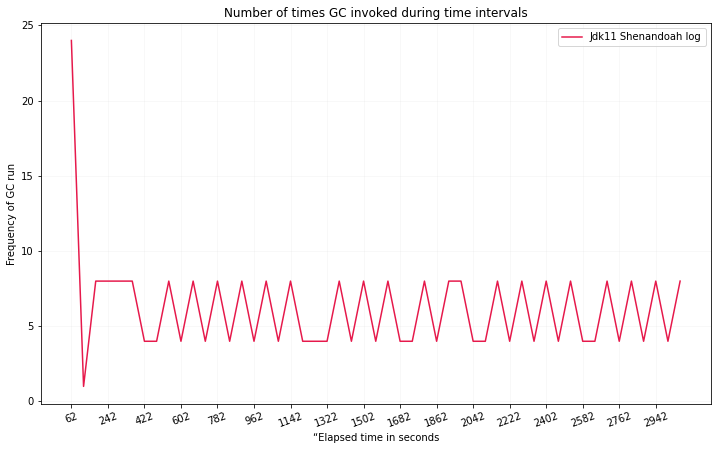

In [211]:
from plotting2 import plot_frequency_of_gc_intervals

plot = plot_frequency_of_gc_intervals(gc_event_dataframes, 
                                      filter_by = pauses_only, 
                                      interval_duration = 60 , 
                                      labels = labels)
plot.set_ylabel("Frequency of GC run")
plot.set_xlabel("“Elapsed time in seconds")
plot.set_title("Number of times GC invoked during time intervals")
plot.grid(alpha = 0.1)
_ = plt.xticks(rotation = 20)

In [240]:
# def div_by_1000(number):
#     return float(number) / 1000
# gc_event_dataframes[-1]["athena_metric"] = list(map(div_by_1000, list(gc_event_dataframes[-1]["athena_metric"])))

time_data = [180 * time + 1 for time in range(len(gc_event_dataframes[-1]["athena_metric"]))]
print(time_data)
gc_event_dataframes[-1]["TimeFromStart_seconds"] = time_data

[1, 181, 361, 541, 721, 901, 1081, 1261, 1441, 1621, 1801, 1981, 2161, 2341, 2521, 2701, 2881, 3061, 3241, 3421]


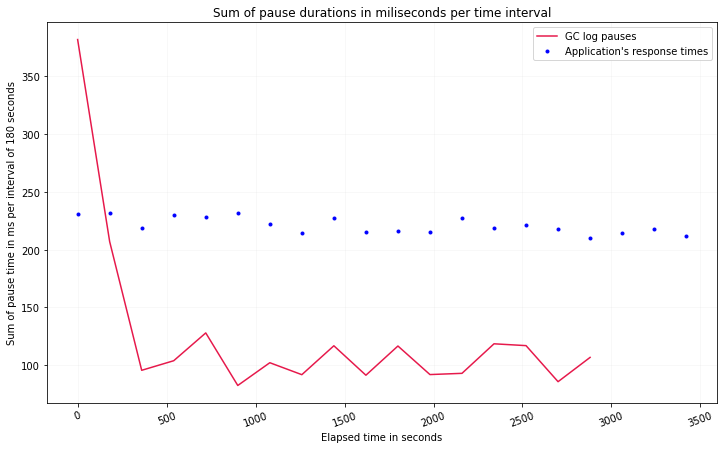

In [241]:
from plotting2 import plot_sum_pause_intervals
interval_duration = 180
plot = plot_sum_pause_intervals(gc_event_dataframes,
                                filter_by = pauses_only,
                                interval_duration = interval_duration, 
                                labels = labels)
_ = plot.set_title("Sum of pause durations in miliseconds per time interval")
plot.set_ylabel("Sum of pause time in ms per interval of " + str(interval_duration) + " seconds", )
plot.set_xlabel("Elapsed time in seconds")
plot.grid(alpha = 0.1)
_ = plt.xticks(rotation = 20)
print("")
labels = ["GC log pauses", "Application's response times"]
def athena_metric_filter(row):
    if "athena_metric" in row:
        if row["athena_metric"]:
            return True
    return False
athena_metric_filter  = [athena_metric_filter]   
plot = plot_scatter(gc_event_dataframes, 
                    filter_by= athena_metric_filter,
                    labels=labels,  
                    column= "athena_metric",
                    plot = plot,
                    colors = ["b"]
                    )

                 


## Here is an example using external data plotted.

2
['Jdk11 Shenandoah log']


Text(0, 0.5, 'Pause duration miliseconds & throughput / 10000')

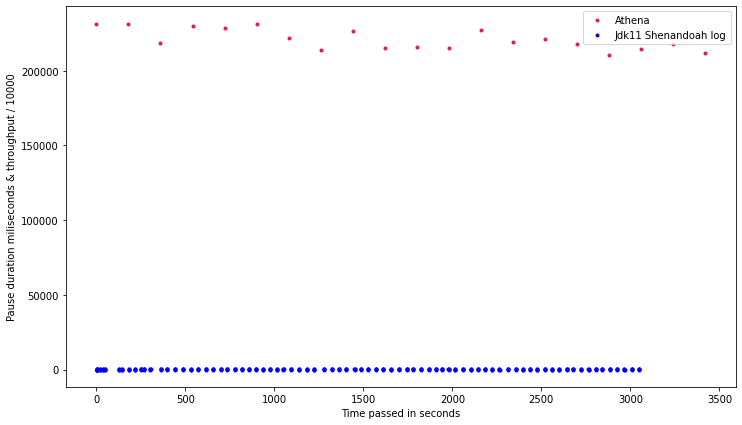

In [213]:
 # Create a filter that will only take rows from a gc_event_dataframe that represent Pauses.
pauses_and_throughput = [(lambda row : row["EventType"] == "Pause" or row["EventName"] == "Transaction")]

def pauses_only(row):
    if "EventType" in row:
        if row["EventType"] == "Pause":
            return True
    return False

pauses_only = [pauses_only]
def athena_metric_filter(row):
    if "athena_metric" in row:
        if row["athena_metric"]:
            return True
    return False
athena_metric_filter  = [athena_metric_filter]

timeFromStart_seconds_athena = [60 * 3 * index for index in range(20)]
def downscale(val):
    return val
    # return float(val) * 10000
gc_event_dataframes[-1]["athena_metric"] = gc_event_dataframes[-1]["athena_metric"].apply(downscale)
print(len(gc_event_dataframes))
print((labels))
labels.append("Athena")
gc_event_dataframes[-1]["TimeFromStart_seconds"] = timeFromStart_seconds_athena
# Apply the filter, and create a plot
plot = plot_scatter(gc_event_dataframes, 
                    filter_by= athena_metric_filter,
                    labels=labels,  
                    column= "athena_metric",
                    )

plot = plot_scatter(gc_event_dataframes,
                    filter_by = pauses_only,
                    labels = labels,
                    colors = ["b"],
                    plot = plot)            
plot.set_xlabel("Time passed in seconds")
plot.set_ylabel("Pause duration miliseconds & throughput / 10000")

## Specific comparison

In [214]:
# def safepoints_JDK11(row):
#     if "TotalApplicationThreadPauseTime_seconds" in row:
#         if row["TotalApplicationThreadPauseTime_seconds"] != None:
#             return True
#     return False

# def safepoints_JDK16(row):
#     if "AtSafepoint_ns" in row:
#         if row["AtSafepoint_ns"] != None:
#             return True
#     return False

# plot = plot_scatter(gc_event_dataframes, column = "AtSafepoint_ns", labels=labels, filter_by = [safepoints_JDK16])
# plot = plot_scatter(gc_event_dataframes, column = "TotalApplicationThreadPauseTime_seconds", labels=labels, plot = plot, filter_by = [safepoints_JDK11])
# plot.set_yscale("log")
# plot.set_ylabel("Safepoint thread pause time")
# plot.set_xlabel("Time passed in seconds")
# plot.set_title("Time spent at safepoints during runtime")

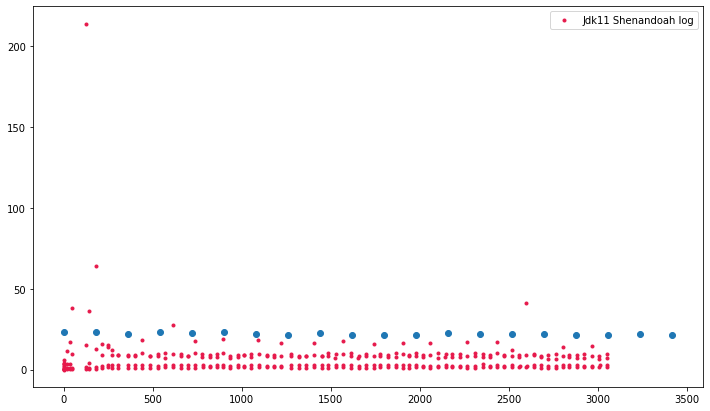

In [215]:
import csv

throughput = []
with open('/Users/ellisbrown/Desktop/Project/datasets/other-team-analysis/throughput.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for idx, (time, value) in enumerate(spamreader):
        if idx != 0:
            throughput.append(float(value) / 10000)

times = [180 * index for index in range(len(throughput))]

f, axs = plt.subplots()

axs.scatter(times, throughput)
plot = plot_scatter(gc_event_dataframes, labels = labels, filter_by = pauses_only, plot = axs)
